In [2]:
"""
Gap Filling with MLM - Interactive Notebook
Beautiful visualizations and analysis
"""

import warnings
warnings.filterwarnings('ignore')

from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📦 Loading BERT model... (wait 30-60 seconds)")

✅ Libraries imported successfully!
📦 Loading BERT model... (wait 30-60 seconds)


In [3]:
mlm_model = pipeline('fill-mask', model='bert-base-uncased')

print("✅ BERT Model loaded successfully!")
print(f"📊 Model: {mlm_model.model.config._name_or_path}")
print(f"🔢 Vocabulary size: {mlm_model.model.config.vocab_size:,}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


✅ BERT Model loaded successfully!
📊 Model: bert-base-uncased
🔢 Vocabulary size: 30,522


In [4]:
def predict_masked_word(sentence):
    """
    Predict masked word and return results
    """
    if '[MASK]' not in sentence:
        print("❌ Error: Please include [MASK] in your sentence")
        return None
    
    predictions = mlm_model(sentence)
    
    # Create DataFrame
    df = pd.DataFrame([
        {
            'Rank': i+1,
            'Word': pred['token_str'],
            'Confidence': pred['score'] * 100,
            'Score': pred['score']
        }
        for i, pred in enumerate(predictions)
    ])
    
    return df, predictions

# Test it
sentence = "The cat sat on the [MASK]."
df, preds = predict_masked_word(sentence)
print(f"\n📝 Input: {sentence}\n")
print(df.to_string(index=False))


📝 Input: The cat sat on the [MASK].

 Rank   Word  Confidence    Score
    1  floor   31.445846 0.314458
    2    bed   11.902329 0.119023
    3  couch   10.695992 0.106960
    4   sofa    6.032623 0.060326
    5 ground    5.508210 0.055082


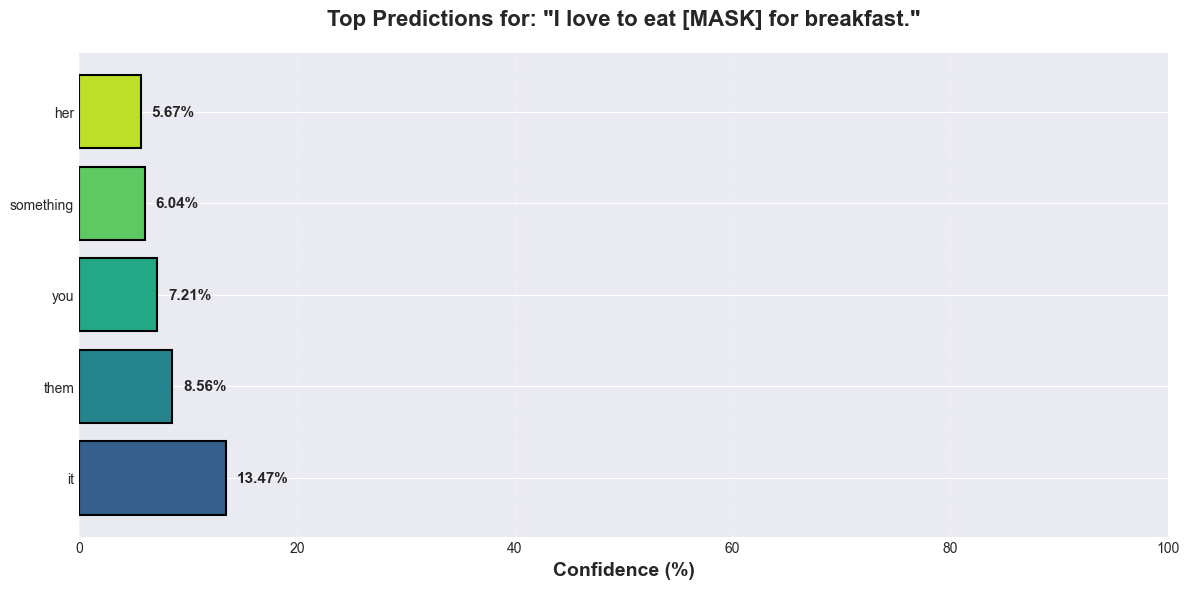


✅ Best Completion: I love to eat **IT** for breakfast.


In [5]:
def visualize_predictions_bar(sentence, predictions):
    """
    Create a beautiful bar chart of predictions
    """
    words = [pred['token_str'] for pred in predictions]
    scores = [pred['score'] * 100 for pred in predictions]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create bars with gradient colors
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(words)))
    bars = ax.barh(words, scores, color=colors, edgecolor='black', linewidth=1.5)
    
    # Customize
    ax.set_xlabel('Confidence (%)', fontsize=14, fontweight='bold')
    ax.set_title(f'Top Predictions for: "{sentence}"', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlim(0, 100)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar, score in zip(bars, scores):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{score:.2f}%', 
                va='center', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Show best completion
    best_word = words[0]
    completed = sentence.replace('[MASK]', f'**{best_word.upper()}**')
    print(f"\n✅ Best Completion: {completed}")

# Test visualization
sentence = "I love to eat [MASK] for breakfast."
df, preds = predict_masked_word(sentence)
visualize_predictions_bar(sentence, preds)

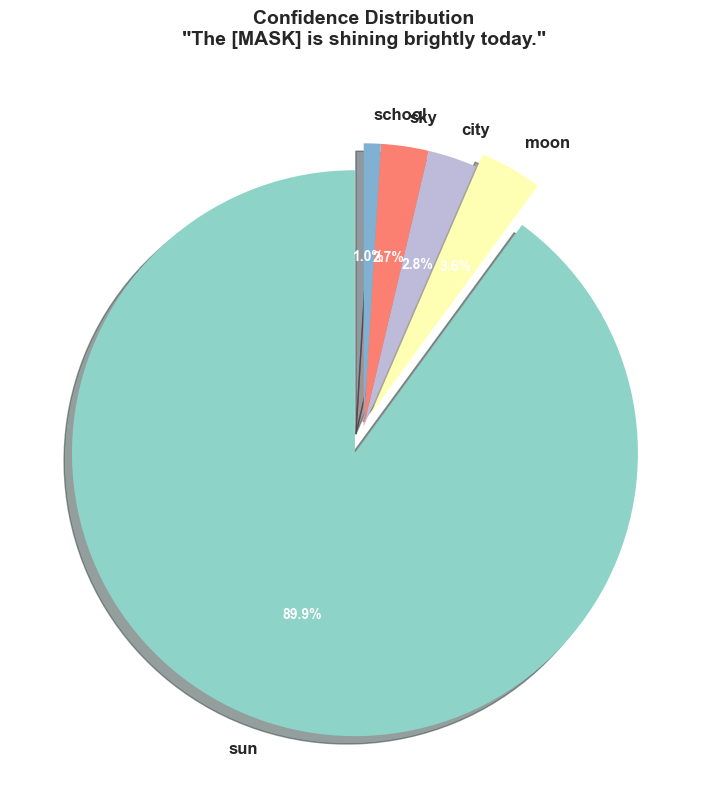

In [6]:
def visualize_predictions_pie(sentence, predictions):
    """
    Create a pie chart showing confidence distribution
    """
    words = [pred['token_str'] for pred in predictions]
    scores = [pred['score'] * 100 for pred in predictions]
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        scores, 
        labels=words, 
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        explode=[0.1, 0.05, 0, 0, 0],  # Explode top predictions
        shadow=True
    )
    
    # Beautify text
    for text in texts:
        text.set_fontsize(12)
        text.set_fontweight('bold')
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    ax.set_title(f'Confidence Distribution\n"{sentence}"', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

# Test
sentence = "The [MASK] is shining brightly today."
df, preds = predict_masked_word(sentence)
visualize_predictions_pie(sentence, preds)

In [7]:
def compare_sentences(sentences):
    """
    Compare predictions across multiple sentences
    """
    results = []
    
    for sent in sentences:
        df, preds = predict_masked_word(sent)
        if df is not None:
            top_word = df.iloc[0]['Word']
            top_conf = df.iloc[0]['Confidence']
            results.append({
                'Sentence': sent.replace('[MASK]', '_____'),
                'Top Prediction': top_word,
                'Confidence': f"{top_conf:.2f}%"
            })
    
    comparison_df = pd.DataFrame(results)
    
    # Display as styled table
    return comparison_df.style.set_properties(**{
        'text-align': 'left',
        'font-size': '12pt',
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
    ])

# Test comparison
test_sentences = [
    "The cat sat on the [MASK].",
    "I love to eat [MASK] for breakfast.",
    "Python is a [MASK] programming language.",
    "The capital of France is [MASK].",
    "Water boils at 100 degrees [MASK]."
]

print("📊 Comparing Multiple Sentences:\n")
compare_sentences(test_sentences)

📊 Comparing Multiple Sentences:



,Sentence,Top Prediction,Confidence
0,The cat sat on the _____.,floor,31.45%
1,I love to eat _____ for breakfast.,it,13.47%
2,Python is a _____ programming language.,python,76.28%
3,The capital of France is _____.,paris,41.68%
4,Water boils at 100 degrees _____.,c,22.19%


In [8]:
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

def interactive_predictor(sentence="The [MASK] is amazing."):
    """
    Interactive prediction with real-time updates
    """
    clear_output(wait=True)
    
    if '[MASK]' not in sentence:
        print("⚠️ Please include [MASK] in your sentence")
        return
    
    df, preds = predict_masked_word(sentence)
    if df is not None:
        print(f"📝 Input: {sentence}\n")
        display(df)
        visualize_predictions_bar(sentence, preds)

# Create interactive widget
interact(
    interactive_predictor,
    sentence=widgets.Text(
        value='The weather is [MASK] today.',
        placeholder='Enter sentence with [MASK]',
        description='Sentence:',
        layout=widgets.Layout(width='500px')
    )
)

interactive(children=(Text(value='The weather is [MASK] today.', description='Sentence:', layout=Layout(width=…

<function __main__.interactive_predictor(sentence='The [MASK] is amazing.')>

🔄 Processing sentences...

[1/4] The cat sat on the [MASK].
[2/4] I love to eat [MASK] for breakfast.
[3/4] The [MASK] is shining brightly today.
[4/4] Machine learning is a subset of artificial [MASK].

📊 BATCH ANALYSIS SUMMARY


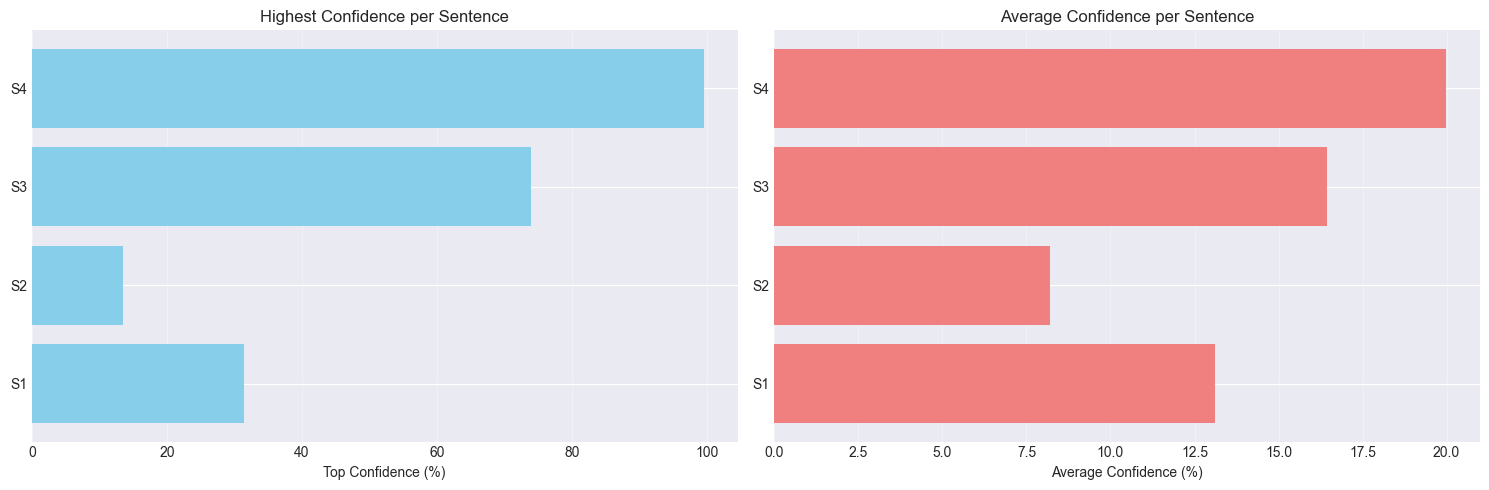

,Sentence,Top_Word,Top_Confidence,Avg_Confidence,Predictions
0,The cat sat on the [MASK].,floor,31.445846,13.117000,"[floor, bed, couch, sofa, ground]"
1,I love to eat [MASK] for breakfast.,it,13.471799,8.191660,"[it, them, you, something, her]"
2,The [MASK] is shining brightly today.,sun,73.967439,16.447810,"[sun, moon, city, sky, school]"
3,Machine learning is a subset of artificial [MA...,intelligence,99.589550,19.993859,"[intelligence, learning, neural, languages, re..."


In [9]:
def batch_analysis(sentences):
    """
    Analyze multiple sentences and create summary
    """
    all_results = []
    
    print("🔄 Processing sentences...\n")
    
    for i, sent in enumerate(sentences, 1):
        print(f"[{i}/{len(sentences)}] {sent}")
        df, preds = predict_masked_word(sent)
        
        if df is not None:
            all_results.append({
                'Sentence': sent,
                'Top_Word': df.iloc[0]['Word'],
                'Top_Confidence': df.iloc[0]['Confidence'],
                'Avg_Confidence': df['Confidence'].mean(),
                'Predictions': df['Word'].tolist()
            })
    
    # Create summary
    summary_df = pd.DataFrame(all_results)
    
    print("\n" + "="*80)
    print("📊 BATCH ANALYSIS SUMMARY")
    print("="*80)
    
    # Plot summary
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: Top confidence by sentence
    ax1.barh(range(len(summary_df)), summary_df['Top_Confidence'], color='skyblue')
    ax1.set_yticks(range(len(summary_df)))
    ax1.set_yticklabels([f"S{i+1}" for i in range(len(summary_df))])
    ax1.set_xlabel('Top Confidence (%)')
    ax1.set_title('Highest Confidence per Sentence')
    ax1.grid(axis='x', alpha=0.3)
    
    # Plot 2: Average confidence
    ax2.barh(range(len(summary_df)), summary_df['Avg_Confidence'], color='lightcoral')
    ax2.set_yticks(range(len(summary_df)))
    ax2.set_yticklabels([f"S{i+1}" for i in range(len(summary_df))])
    ax2.set_xlabel('Average Confidence (%)')
    ax2.set_title('Average Confidence per Sentence')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return summary_df

# Test batch processing
batch_sentences = [
    "The cat sat on the [MASK].",
    "I love to eat [MASK] for breakfast.",
    "The [MASK] is shining brightly today.",
    "Machine learning is a subset of artificial [MASK]."
]

results = batch_analysis(batch_sentences)
display(results)

In [10]:
def save_predictions(sentence, predictions, filename='predictions.csv'):
    """
    Save predictions to CSV file
    """
    df, _ = predict_masked_word(sentence)
    if df is not None:
        df['Input_Sentence'] = sentence
        df.to_csv(filename, index=False)
        print(f"✅ Results saved to {filename}")
        return df

# Example: Save results
sentence = "The future of AI is [MASK]."
df, preds = predict_masked_word(sentence)
save_predictions(sentence, preds, 'my_predictions.csv')

✅ Results saved to my_predictions.csv


,Rank,Word,Confidence,Score,Input_Sentence
0,1,uncertain,66.267496,0.662675,The future of AI is [MASK].
1,2,unknown,12.653792,0.126538,The future of AI is [MASK].
2,3,unclear,4.297143,0.042971,The future of AI is [MASK].
3,4,bleak,0.999586,0.009996,The future of AI is [MASK].
4,5,clear,0.802352,0.008024,The future of AI is [MASK].


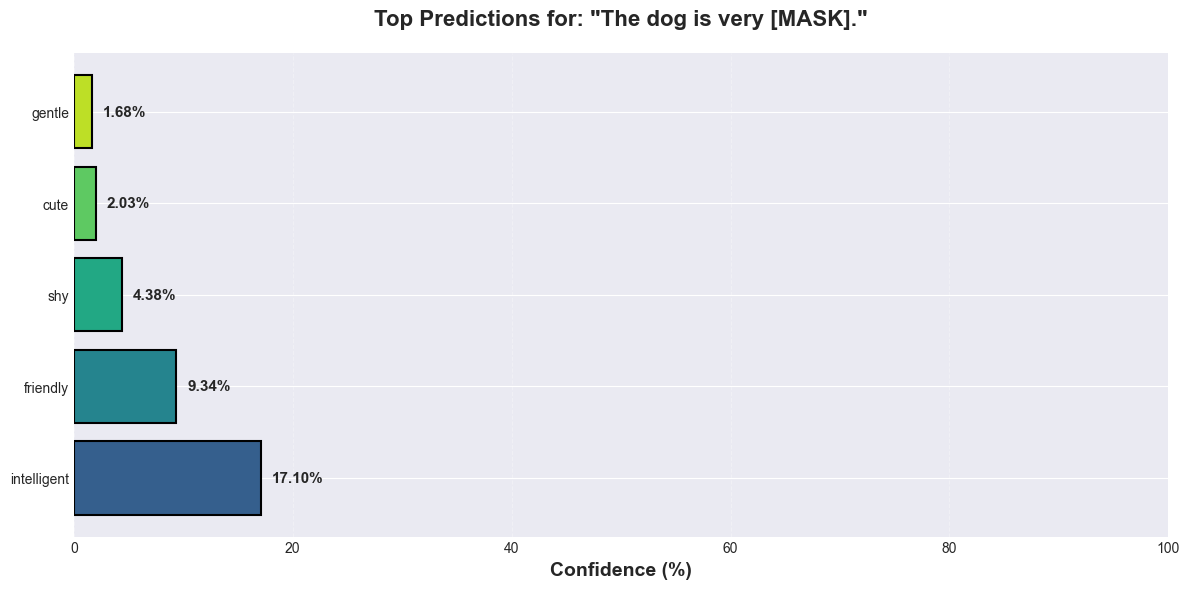


✅ Best Completion: The dog is very **INTELLIGENT**.



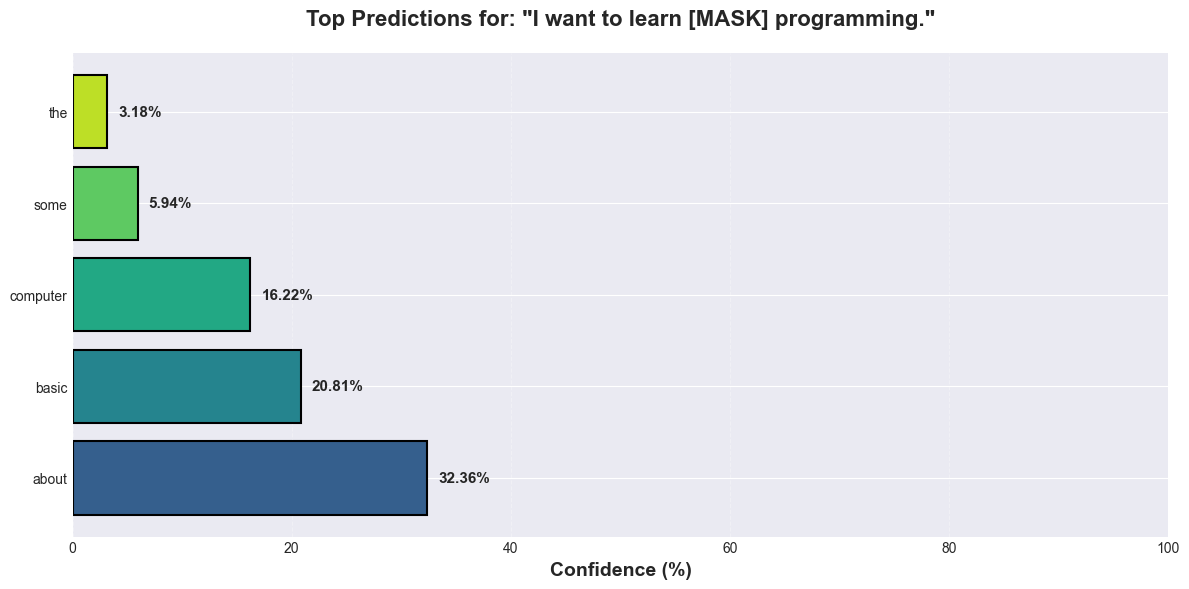


✅ Best Completion: I want to learn **ABOUT** programming.



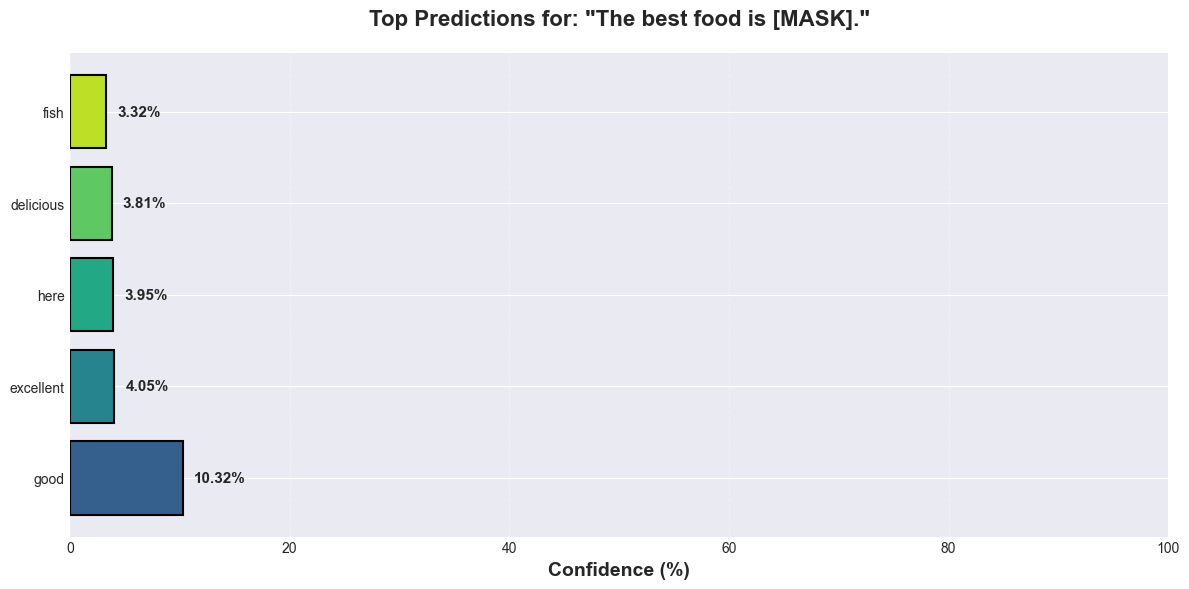


✅ Best Completion: The best food is **GOOD**.


In [11]:
# 🎯 YOUR TURN! Try your own sentences here:

my_sentences = [
    "The dog is very [MASK].",
    "I want to learn [MASK] programming.",
    "The best food is [MASK].",
    # Add more sentences here!
]

for sentence in my_sentences:
    print("\n" + "="*70)
    df, preds = predict_masked_word(sentence)
    if df is not None:
        visualize_predictions_bar(sentence, preds)